<a href="https://colab.research.google.com/github/VIPinKumar07/Quantitative-Finance/blob/main/Portfolio%20Optimization%20Project/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
!pip install plotly_express

In [3]:
import numpy as np  # Linear Alzebra
import pandas as pd # Data Processing
import pandas_datareader.data as web  # Data Reading
import matplotlib.pyplot as plt # Data Visualization
import plotly_express as px
import seaborn as sns
import datetime as dt # For data&time format
import yfinance as yf # for downloading financial data

In [60]:
tickers = ['TSLA','GOOG','MSFT','JPM','MS','META']  # Stocks in portfolio
num_securities = len(tickers)

start = dt.datetime(2015,1,1) # Start date of data
end = dt.datetime.today()     # End date of data

df = yf.download(tickers, start, end) # Downloading stocks historical data

df.columns = ['_'.join(col) for col in df.columns]  # Adjust column names
df = df.iloc[:,:num_securities] # Truncating dataset (only Adj Close)

print(df.shape)
df.head()

[*********************100%%**********************]  6 of 6 completed
(2260, 6)


,Adj Close_GOOG,Adj Close_JPM,Adj Close_META,Adj Close_MS,Adj Close_MSFT,Adj Close_TSLA
Date,,,,,,
2015-01-02,26.168653,48.849251,78.449997,30.594940,40.452736,14.620667
2015-01-05,25.623152,47.332726,77.190002,29.638588,40.080753,14.006000
2015-01-06,25.029282,46.105438,76.150002,28.784992,39.492455,14.085333
2015-01-07,24.986401,46.175797,76.150002,29.195986,39.994228,14.063333
2015-01-08,25.065184,47.207649,78.180000,29.630686,41.170780,14.041333


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2260 entries, 2015-01-02 to 2023-12-22
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close_GOOG  2260 non-null   float64
 1   Adj Close_JPM   2260 non-null   float64
 2   Adj Close_META  2260 non-null   float64
 3   Adj Close_MS    2260 non-null   float64
 4   Adj Close_MSFT  2260 non-null   float64
 5   Adj Close_TSLA  2260 non-null   float64
dtypes: float64(6)
memory usage: 123.6 KB


In [62]:
df.describe()

,Adj Close_GOOG,Adj Close_JPM,Adj Close_META,Adj Close_MS,Adj Close_MSFT,Adj Close_TSLA
count,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000
mean,73.491102,97.756072,190.008770,51.727324,156.434552,102.617146
std,36.490516,33.770034,76.135977,23.779714,100.815920,110.849592
min,24.560070,42.509560,74.050003,17.512760,34.950611,9.578000
25%,41.779751,72.051031,130.017502,34.819961,60.038993,16.667500
50%,59.748749,94.661884,177.169998,42.243174,129.118378,23.154333
75%,104.775373,126.329735,235.657494,77.877348,247.041771,213.577499
max,150.709000,168.449997,382.179993,101.821114,382.700012,409.970001


In [63]:
# Line plot of each stock price
px.line(df)

In [64]:
px.line(df*100/df.iloc[0])

In [65]:
px.line(df.pct_change())

In [66]:
np.random.seed(3)

# Generating random weights for each stock
weights = np.random.random((num_securities,1))
# Normalising weights
weights = weights/sum(weights)
print("Normalised Weights: {}".format(weights.flatten()))

Normalised Weights: [0.14306743 0.18393841 0.07556128 0.13268532 0.23193921 0.23280835]


In [67]:
# Return percentage with respect to last day
ret = df/df.shift(1)
# Log return (Normal Distribution, Stationary, Mathematical Convenience)
log_ret = np.log(ret)

# Overall Extected return after one business year(252 days)
exp_ret = log_ret.mean().dot(weights)*252
print("Annualized Expected Return of the Portfolio: {}".format(exp_ret[0]))

# Annualized Extected Volatility
exp_vol = np.sqrt(weights.T.dot(252*log_ret.cov().dot(weights)))
print("\nAnnualized Expected Volatility of the Portfolio: {}".format(exp_vol[0][0]))

# Sharp Ration
sr = exp_ret/exp_vol
print("\nAnnualized Sharp Ratio of the Portfolio: {}".format(sr[0][0]))

Annualized Expected Return of the Portfolio: 0.21297365541251437

Annualized Expected Volatility of the Portfolio: 0.26774189875739046

Annualized Sharp Ratio of the Portfolio: 0.795443882339449


## Monte Carlo Simulation

In [74]:
# Number of iterations
n = 10000

# Portfolio Parameters
Port_weights = np.zeros((n, num_securities))  # Portfolio weights list
Port_return = np.zeros(n) # Portfolio returns list
Port_vol  = np.zeros(n)   # Portfolio volitility list
Port_sr = np.zeros(n)     # Portfolio sharpe ratio list



In [75]:
for i in range(n):
  # Random weights initialization for each iteration and adding it in portfolio weights list
  weights = np.random.random(num_securities)
  weights /= np.sum(weights)
  Port_weights[i,:] = weights

  # Expected Return calculation for each iteration and adding it to portfolio return list
  exp_ret = log_ret.mean().dot(weights)*252
  Port_return[i] = exp_ret

  # Expected Volatility calculation for each iteration and adding it to portfolio volatility list
  exp_vol = np.sqrt(weights.T.dot(252*log_ret.cov().dot(weights)))
  Port_vol[i] = exp_vol

  # Expected Sharpe Ration calculation for each iteration and adding it to portfolio sr list
  exp_sr = exp_ret/exp_vol
  Port_sr[i] = exp_sr


In [76]:
# Index of max Sharpe Ratio
max_sr = Port_sr.max()
ind = Port_sr.argmax()
print(max_sr)

# Return and Volatility at Max SR
max_sr_ret = Port_return[ind]
max_sr_vol = Port_vol[ind]


0.8964159801960723


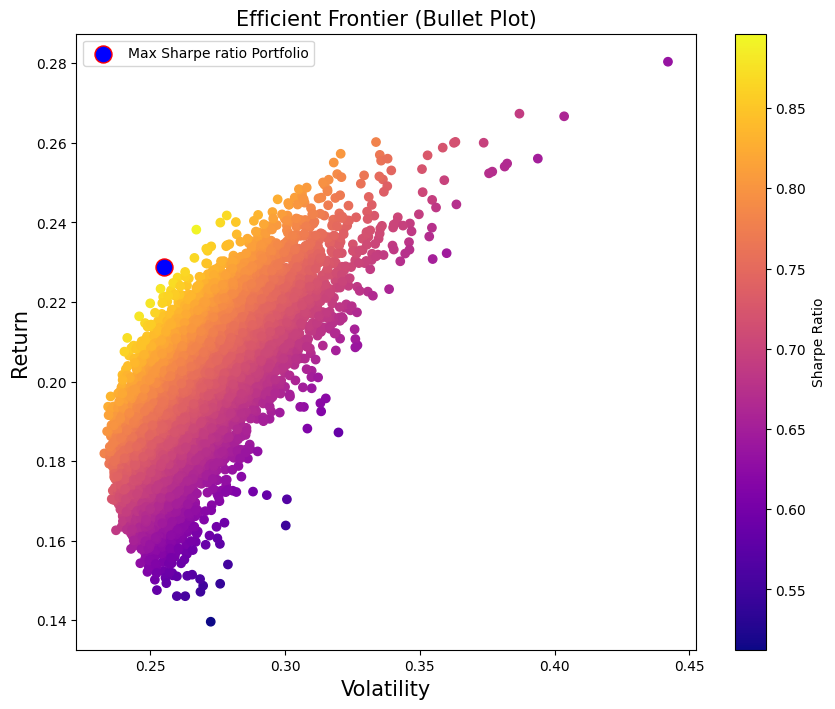

In [77]:
# Plotting
plt.figure(figsize=(10,8))
plt.scatter(Port_vol,Port_return,c=Port_sr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.title('Efficient Frontier (Bullet Plot)', fontsize=15)
plt.scatter(max_sr_vol, max_sr_ret, c='blue', s=150, edgecolors='red', marker='o', label='Max \
Sharpe ratio Portfolio')
plt.legend()

In [78]:
for weight, stock in zip(Port_weights[ind],tickers):
    print(f'{round(weight * 100, 2)} % of {stock} should be bought.')

# best portfolio return
print(f'\nMarkowitz optimal portfolio return is : {round(max_sr_ret * 100, 2)}% with volatility \
{max_sr_vol}')

9.69 % of TSLA should be bought.
11.16 % of GOOG should be bought.
5.74 % of MSFT should be bought.
1.61 % of JPM should be bought.
64.28 % of MS should be bought.
7.52 % of META should be bought.

Markowitz optimal portfolio return is : 22.88% with volatility 0.25522313086842446


In [80]:
def Optimize_port(df, num_securities):
  returns = df/df.shift(1)
  log_returns = np.log(ret)

  # Number of iterations
  n = 10000

  # Portfolio Parameters
  Port_weights = np.zeros((n, num_securities))  # Portfolio weights list
  Port_return = np.zeros(n) # Portfolio returns list
  Port_vol  = np.zeros(n)   # Portfolio volitility list
  Port_sr = np.zeros(n)     # Portfolio sharpe ratio list

  for i in range(n):
    # Random weights initialization for each iteration and adding it in portfolio weights list
    weights = np.random.random(num_securities)
    weights /= np.sum(weights)
    Port_weights[i,:] = weights
    # Expected Return calculation for each iteration and adding it to portfolio return list
    exp_ret = log_ret.mean().dot(weights)*252
    Port_return[i] = exp_ret

    # Expected Volatility calculation for each iteration and adding it to portfolio volatility list
    exp_vol = np.sqrt(weights.T.dot(252*log_ret.cov().dot(weights)))
    Port_vol[i] = exp_vol

    # Expected Sharpe Ration calculation for each iteration and adding it to portfolio sr list
    exp_sr = exp_ret/exp_vol
    Port_sr[i] = exp_sr


  # Index of max Sharpe Ratio
  max_sr = Port_sr.max()
  ind = Port_sr.argmax()

  # Return and Volatility at Max SR
  max_sr_ret = Port_return[ind]
  max_sr_vol = Port_vol[ind]
  max_sr_weights = Port_weights[ind]

  return max_sr_weights, max_sr_ret, max_sr_vol, max_sr

In [82]:
W,R,V,SR = Optimize_port(df, 6)

print("Optimized Weights = {}".format(W.flatten()))
print("Optimized Returns = {}".format(R))
print("Optimized Volatility = {}".format(V))
print("Optimized Sharpe Ratio = {}".format(SR))

Optimized Weights = [0.0299815  0.06263349 0.01399111 0.08011802 0.77102186 0.04225402]
Optimized Returns = 0.23136809622308532
Optimized Volatility = 0.2593465807513984
Optimized Sharpe Ratio = 0.8921193236970709
